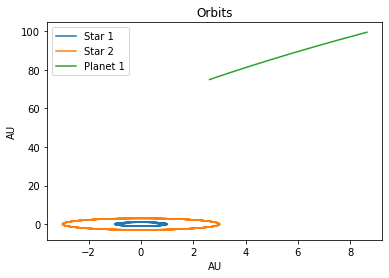

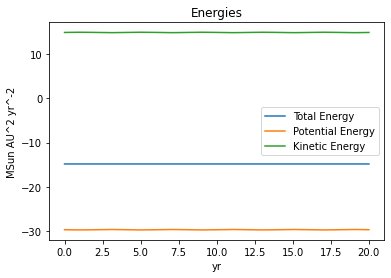

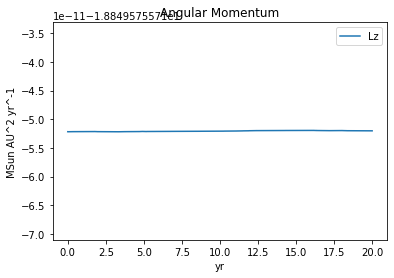

In [16]:
from Physics import *
        
Star1   = Particle("Star 1"  ,3.0, Vector(-3,0,0),  Vector(0,2.0*np.pi,0),Vector(0,0,0))
Star2   = Particle("Star 2"  ,1.0, Vector(1.0,0,0), Vector(0,0,0),      Vector(0,0,0))
Planet1 = Particle("Planet 1",1e-6, r0, v0,     Vector(0,0,0))
Planet2 = Particle("Planet 2",1e-6,Vector(8.,0,0),  Vector(0,7.5,0),    Vector(0,0,0))

Sim = Simulator([Star1,Star2,Planet1])
Sim.GoToCM()
#Sim.GoToSynodic()
Sim.Simulate(20,10000)
Sim.GeneratePlots()



In [19]:
from Physics import *

S1   = QParticle("Star 1"  ,3.0, Vector(-3,0,0),  Vector(0,2.0*np.pi,0),Vector(0,0,0))
S2   = QParticle("Star 2"  ,1.0, Vector(1.0,0,0), Vector(0,0,0),      Vector(0,0,0))
P1   = QParticle("Planet 1",1e-6,Vector(-8.,0,0), Vector(0,-2.0,0),     Vector(0,0,0))


QSim = QSimulator([S1,S2,P1])
QSim.GoToCM()

conditions = open("conditions.txt", "w")
bound = 75**2 #75 AU away from system

rmin  = -10 #AU
rmax  = 10
vmin  = -5
vmax  = 5
steps = 3

for rx in range(steps):
    for ry in range(steps):
        for vx in range(steps):
            for vy in range(steps):
                t  = 0
                dt = 0.005
                v0 = Vector(vmin+vx*(vmax-vmin)/steps,vmin+vy*(vmax-vmin)/steps,0)
                r0 = Vector(rmin+rx*(rmax-rmin)/steps,rmin+ry*(rmax-rmin)/steps,0)
                QSim.Particles[2].Pos = r0
                QSim.Particles[2].Vel = v0
                while t < 100:
                    t += dt
                    QSim.Simulate(dt)
                    if (P1.Pos*P1.Pos > bound):
                        conditions.write(str(t)+ "," +str(r0)+ "," +str(v0))
                        print(conditions)
                        break
conditions.close()

[[<Physics.Vector object at 0x0000014806DC2160>, <Physics.Vector object at 0x0000014806DD52B0>, 10.148999999999814]]
[[<Physics.Vector object at 0x0000014806DC2160>, <Physics.Vector object at 0x0000014806DD52B0>, 10.148999999999814], [<Physics.Vector object at 0x0000014808905A00>, <Physics.Vector object at 0x0000014808905280>, 20.689000000002302]]
[[<Physics.Vector object at 0x0000014806DC2160>, <Physics.Vector object at 0x0000014806DD52B0>, 10.148999999999814], [<Physics.Vector object at 0x0000014808905A00>, <Physics.Vector object at 0x0000014808905280>, 20.689000000002302], [<Physics.Vector object at 0x0000014806DDA880>, <Physics.Vector object at 0x0000014806DDA940>, 20.78500000000242]]
[[<Physics.Vector object at 0x0000014806DC2160>, <Physics.Vector object at 0x0000014806DD52B0>, 10.148999999999814], [<Physics.Vector object at 0x0000014808905A00>, <Physics.Vector object at 0x0000014808905280>, 20.689000000002302], [<Physics.Vector object at 0x0000014806DDA880>, <Physics.Vector objec

In [20]:
print(r0)

(39.58867564563851,63.89028171373216,0.0)


In [21]:
f = open("conditions.txt", "w")
f.write(str(r0))
f.close()